🔍 CHAPTER 2: EDGE DETECTION
How robots find boundaries and shapes in images!

🤔 WHAT IS AN EDGE?
An edge is where pixel values CHANGE suddenly.
Like going from black (0) to white (255) quickly.

📐 CREATED A SIMPLE IMAGE WITH EDGES:
- Black background (0)
- White rectangle in middle (255)
- Where black meets white = EDGES!


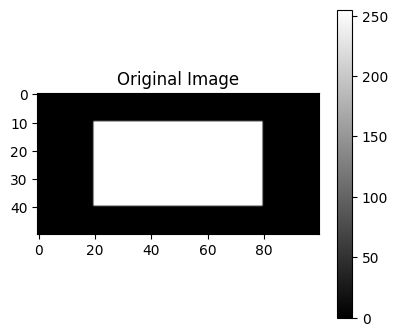

In [8]:
# ============================================
# CHAPTER 2: FINDING EDGES - HOW ROBOTS SEE SHAPES
# ============================================
# AI-NATIVE TEXTBOOK: Physical AI & Humanoid Robotics
# Interactive Learning Experiment

print(" CHAPTER 2: EDGE DETECTION")
print("How robots find boundaries and shapes in images!")

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# PART 1: UNDERSTANDING EDGES
# ============================================

print("\n WHAT IS AN EDGE?")
print("An edge is where pixel values CHANGE suddenly.")
print("Like going from black (0) to white (255) quickly.")

# Create a simple image with an obvious edge
simple_image = np.zeros((50, 100))  # 50 rows, 100 columns (all black)

# Add a white rectangle (creates edges!)
simple_image[10:40, 20:80] = 255  # White rectangle in the middle

print("\n CREATED A SIMPLE IMAGE WITH EDGES:")
print("- Black background (0)")
print("- White rectangle in middle (255)")
print("- Where black meets white = EDGES!")

# Display the image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(simple_image, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.colorbar()


In [11]:
# ============================================
# PART 2: MANUAL EDGE DETECTION
# ============================================

print("\n" + "="*50)
print(" HOW COMPUTERS FIND EDGES")
print("="*50)

print("\nStep 1: Look at neighboring pixels")
print("Step 2: Calculate DIFFERENCE between them")
print("Step 3: Big difference = EDGE detected!")

# Let's manually check one row of pixels
sample_row = simple_image[25, :]  # Middle row
print(f"\n Sample row pixel values (row 25):")
print(f"First 10 pixels: {sample_row[:10]}")
print(f"Pixel no. 19-20: {sample_row[19:21]} (Black to White!)")
print(f"Pixel no. 79-80: {sample_row[79:81]} (White to Black!)")



 HOW COMPUTERS FIND EDGES

Step 1: Look at neighboring pixels
Step 2: Calculate DIFFERENCE between them
Step 3: Big difference = EDGE detected!

📊 Sample row pixel values (row 25):
First 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Pixel no. 19-20: [  0. 255.] (Black to White!)
Pixel no. 79-80: [255.   0.] (White to Black!)


In [13]:
# ============================================
# PART 3: SIMPLE EDGE DETECTION FILTER
# ============================================

print("\n" + "="*50)
print(" APPLYING EDGE DETECTION FILTER")
print("="*50)

# Create a simple edge detection kernel
# This kernel finds horizontal differences
kernel = np.array([[1, 0, -1]])

print(f"\n Our Edge Detection Kernel:")
print(kernel)
print("\nHow it works:")
print("- Multiply pixels by kernel values")
print("- Add results together")
print("- Large result = big change = EDGE!")

# Let's apply it manually to a tiny example
print("\n MANUAL EXAMPLE:")
print("Pixels: [0, 0, 0, 255, 255, 255]")
print("Apply kernel [1, 0, -1]:")
print("At position 3: (0*1) + (255*0) + (255*-1) = -255 ← BIG CHANGE!")
print("This negative value indicates an edge!")


 APPLYING EDGE DETECTION FILTER

 Our Edge Detection Kernel:
[[ 1  0 -1]]

How it works:
- Multiply pixels by kernel values
- Add results together
- Large result = big change = EDGE!

 MANUAL EXAMPLE:
Pixels: [0, 0, 0, 255, 255, 255]
Apply kernel [1, 0, -1]:
At position 3: (0*1) + (255*0) + (255*-1) = -255 ← BIG CHANGE!
This negative value indicates an edge!



👁️ VISUALIZING THE EDGES


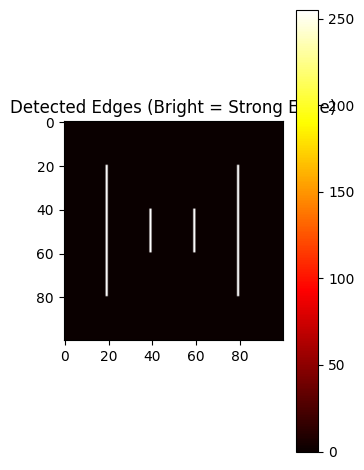

In [5]:
# ============================================
# PART 4: VISUALIZE EDGE DETECTION
# ============================================

print("\n" + "="*50)
print(" VISUALIZING THE EDGES")
print("="*50)

# Create a more interesting test image
test_image = np.zeros((100, 100))
test_image[20:80, 20:80] = 255  # Square
test_image[40:60, 40:60] = 0    # Hole in the middle

# Simple edge detection using numpy
edges = np.abs(np.diff(test_image, axis=1))  # Difference between columns
# Pad to keep same size
edges = np.pad(edges, ((0,0), (0,1)), mode='constant')

# Display results
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='hot', vmin=0, vmax=255)
plt.title("Detected Edges (Bright = Strong Edge)")
plt.colorbar()

plt.tight_layout()
plt.show()


 YOUR TURN: EXPERIMENT WITH EDGES!

🔧 MODIFICATION ZONE:
Try changing these values and re-running:

Current settings:
- Circle radius: 30
- Circle brightness: 250
- Background: 50


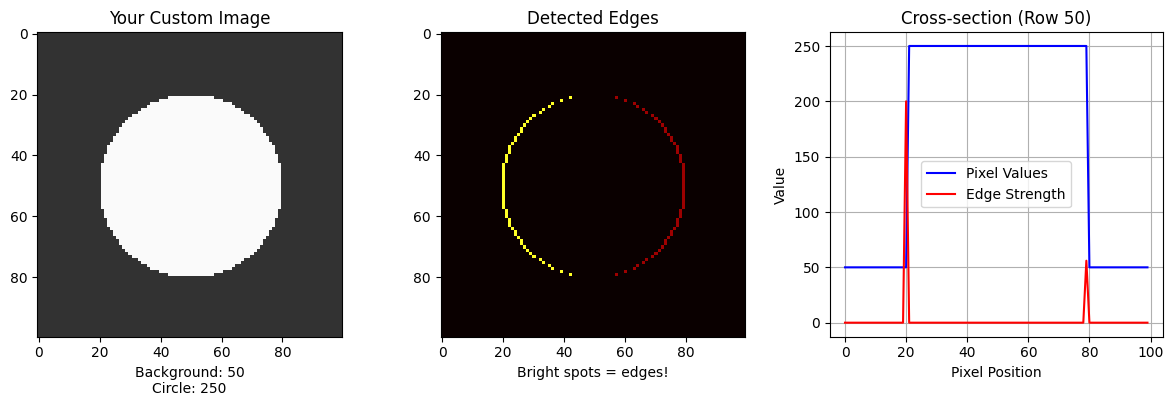

In [14]:
# ============================================
# PART 5: INTERACTIVE EXPERIMENT
# ============================================

print("\n" + "="*50)
print(" YOUR TURN: EXPERIMENT WITH EDGES!")
print("="*50)

print("\n🔧 MODIFICATION ZONE:")
print("Try changing these values and re-running:")

# Interactive variables - READERS CAN MODIFY THESE!
circle_radius = 30  # Try: 20, 40, 50
circle_brightness = 250  # Try: 100, 150, 255
background_value = 50    # Try: 0, 100, 200

print(f"\nCurrent settings:")
print(f"- Circle radius: {circle_radius}")
print(f"- Circle brightness: {circle_brightness}")
print(f"- Background: {background_value}")

# Create image with circle
circle_image = np.full((100, 100), background_value, dtype=np.uint8)
center_x, center_y = 50, 50

# Create grid of coordinates
y, x = np.ogrid[:100, :100]
distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)

# Create circle
circle_image[distance < circle_radius] = circle_brightness

# Detect edges
circle_edges = np.abs(np.diff(circle_image, axis=1))
circle_edges = np.pad(circle_edges, ((0,0), (0,1)), mode='constant')

# Display interactive experiment
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(circle_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Your Custom Image")
axes[0].set_xlabel(f"Background: {background_value}\nCircle: {circle_brightness}")

axes[1].imshow(circle_edges, cmap='hot', vmin=0, vmax=255)
axes[1].set_title("Detected Edges")
axes[1].set_xlabel("Bright spots = edges!")

# Show cross-section
axes[2].plot(circle_image[50, :], 'b-', label='Pixel Values')
axes[2].plot(circle_edges[50, :], 'r-', label='Edge Strength')
axes[2].set_title("Cross-section (Row 50)")
axes[2].set_xlabel("Pixel Position")
axes[2].set_ylabel("Value")
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [9]:
# ============================================
# PART 6: REAL-WORLD CONNECTION
# ============================================

print("\n" + "="*50)
print("🌍 WHY EDGE DETECTION MATTERS")
print("="*50)

print("\n📱 REAL APPLICATIONS:")
print("1. Self-driving cars → Detect lane boundaries")
print("2. Face recognition → Find facial features")
print("3. Medical imaging → Identify tumor boundaries")
print("4. Robotics → Object manipulation and navigation")

print("\n🤖 FOR HUMANOID ROBOTS:")
print("• Identify objects to pick up")
print("• Avoid obstacles while walking")
print("• Recognize human gestures")
print("• Navigate through doors and hallways")


🌍 WHY EDGE DETECTION MATTERS

📱 REAL APPLICATIONS:
1. Self-driving cars → Detect lane boundaries
2. Face recognition → Find facial features
3. Medical imaging → Identify tumor boundaries
4. Robotics → Object manipulation and navigation

🤖 FOR HUMANOID ROBOTS:
• Identify objects to pick up
• Avoid obstacles while walking
• Recognize human gestures
• Navigate through doors and hallways


In [7]:
# ============================================
# PART 7: YOUR CHALLENGES
# ============================================

print("\n" + "="*50)
print("🏆 TRY THESE CHALLENGES!")
print("="*50)

print("\n🎯 EASY:")
print("1. Change circle_radius to 20 - what happens to edges?")
print("2. Set background_value = circle_brightness - why do edges disappear?")

print("\n🎯 MEDIUM:")
print("3. Create TWO circles instead of one")
print("4. Make a rectangle instead of a circle")

print("\n🎯 HARD:")
print("5. Can you detect VERTICAL edges instead of horizontal?")
print("6. Try making the circle fade gradually instead of sharp edges")

print("\n💡 HINT: The kernel [1, 0, -1] detects horizontal changes.")
print("What kernel would detect VERTICAL changes?")

print("\n" + "="*50)
print("🚀 CONGRATULATIONS!")
print("You've just learned how robots find shapes in images!")
print("="*50)


🏆 TRY THESE CHALLENGES!

🎯 EASY:
1. Change circle_radius to 20 - what happens to edges?
2. Set background_value = circle_brightness - why do edges disappear?

🎯 MEDIUM:
3. Create TWO circles instead of one
4. Make a rectangle instead of a circle

🎯 HARD:
5. Can you detect VERTICAL edges instead of horizontal?
6. Try making the circle fade gradually instead of sharp edges

💡 HINT: The kernel [1, 0, -1] detects horizontal changes.
What kernel would detect VERTICAL changes?

🚀 CONGRATULATIONS!
You've just learned how robots find shapes in images!
